# SUPPORT VECTOR MACHINE – Drug Response Classification
## Libraries Used

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Task 1: Exploratory Data Analysis (EDA)
# 1. Load Dataset & Basic Exploration

In [2]:
df = pd.read_csv('Pharma_Industry.csv')
df

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1
...,...,...,...,...,...,...
495,-1.553759,0.506938,0.817890,-0.661245,-1.345393,0
496,0.551476,1.714321,0.340589,1.712558,-0.496315,1
497,-1.072743,-0.221137,0.239247,1.112924,-0.285838,1
498,1.661259,0.245759,-0.457096,0.633355,0.657413,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [4]:
df.describe()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000
mean,-0.037761,0.214957,0.062871,0.054398,-0.171863,0.5200
std,0.979891,1.247567,0.971978,0.986001,0.983765,0.5001
min,-3.019512,-3.773897,-2.940389,-3.401277,-3.110431,0.0000
25%,-0.642003,-0.565168,-0.648157,-0.586085,-0.797715,0.0000
50%,-0.019340,0.201532,0.027732,-0.065661,-0.108106,1.0000
75%,0.641151,0.951375,0.710774,0.633914,0.513555,1.0000
max,2.949094,4.111751,3.193108,3.373269,2.518023,1.0000



## 2.	Utilize histograms, box plots, or density plots to understand feature distributions.


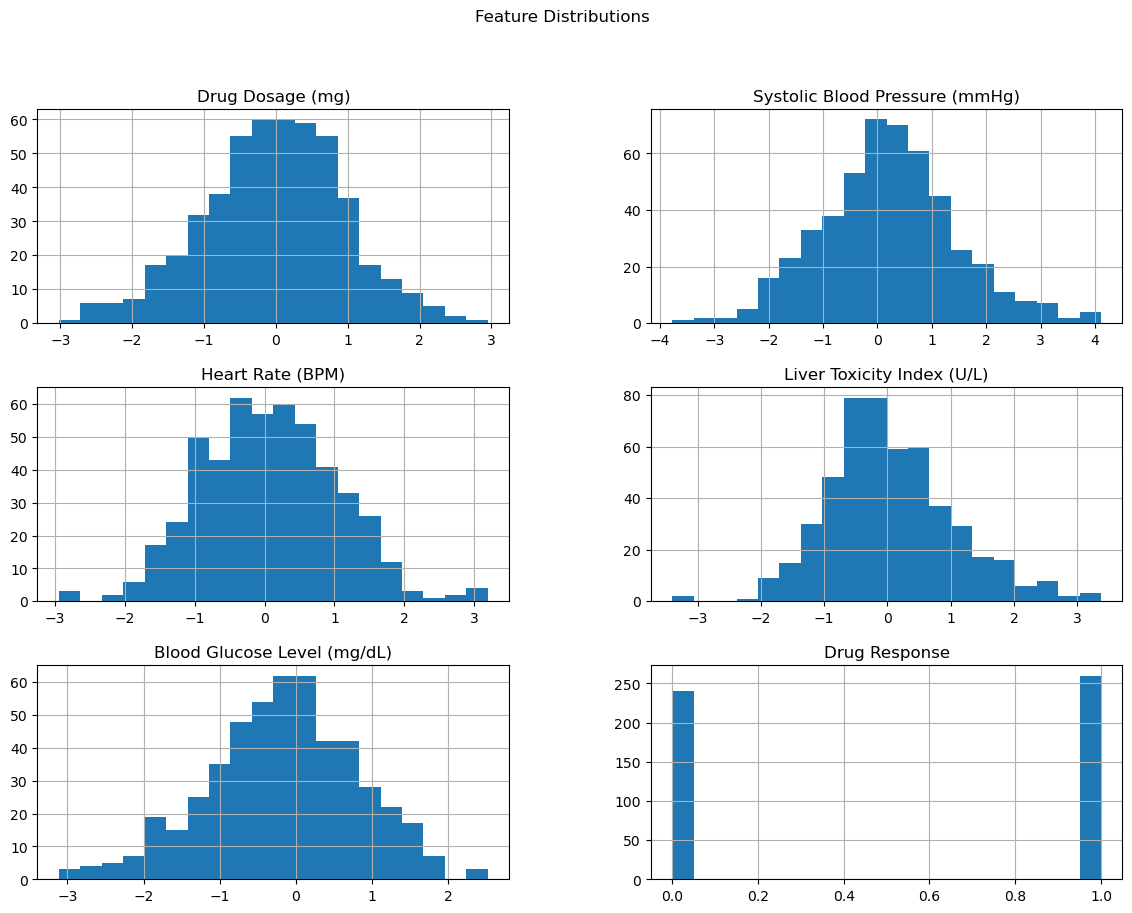

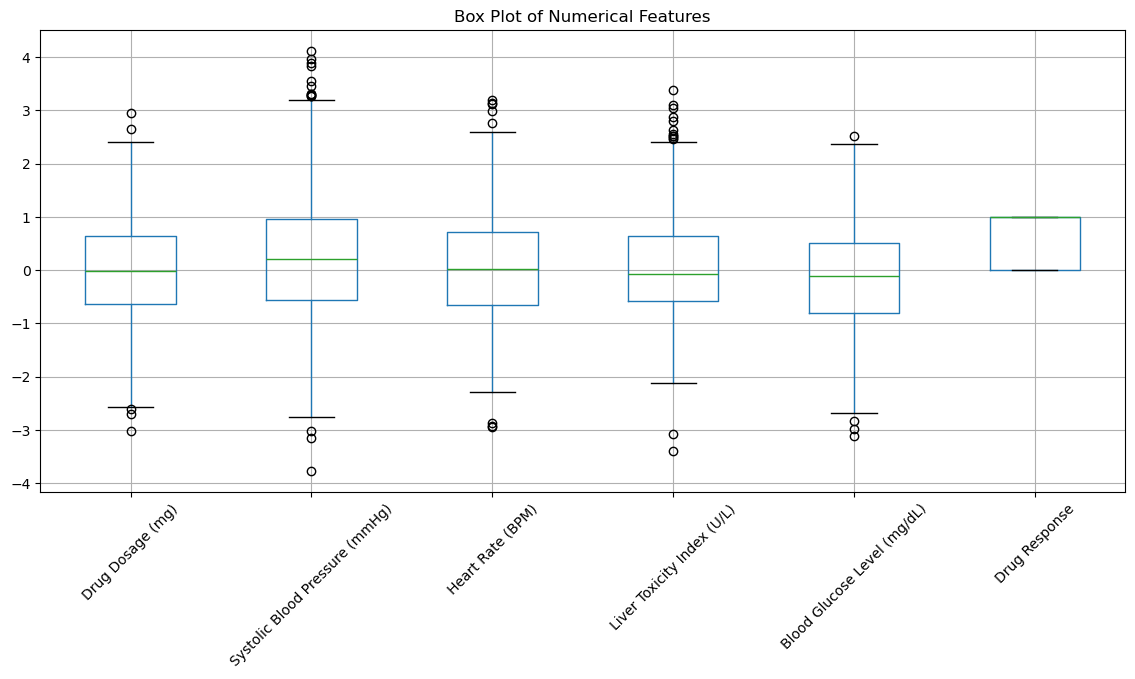

In [5]:
numerical_features = df.select_dtypes(include=['int64','float64']).columns

df[numerical_features].hist(figsize=(14,10), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

plt.figure(figsize=(14,6))
df[numerical_features].boxplot()
plt.xticks(rotation=45)
plt.title("Box Plot of Numerical Features")
plt.show()


## 3.	Investigate feature correlations to discern relationships within the data.

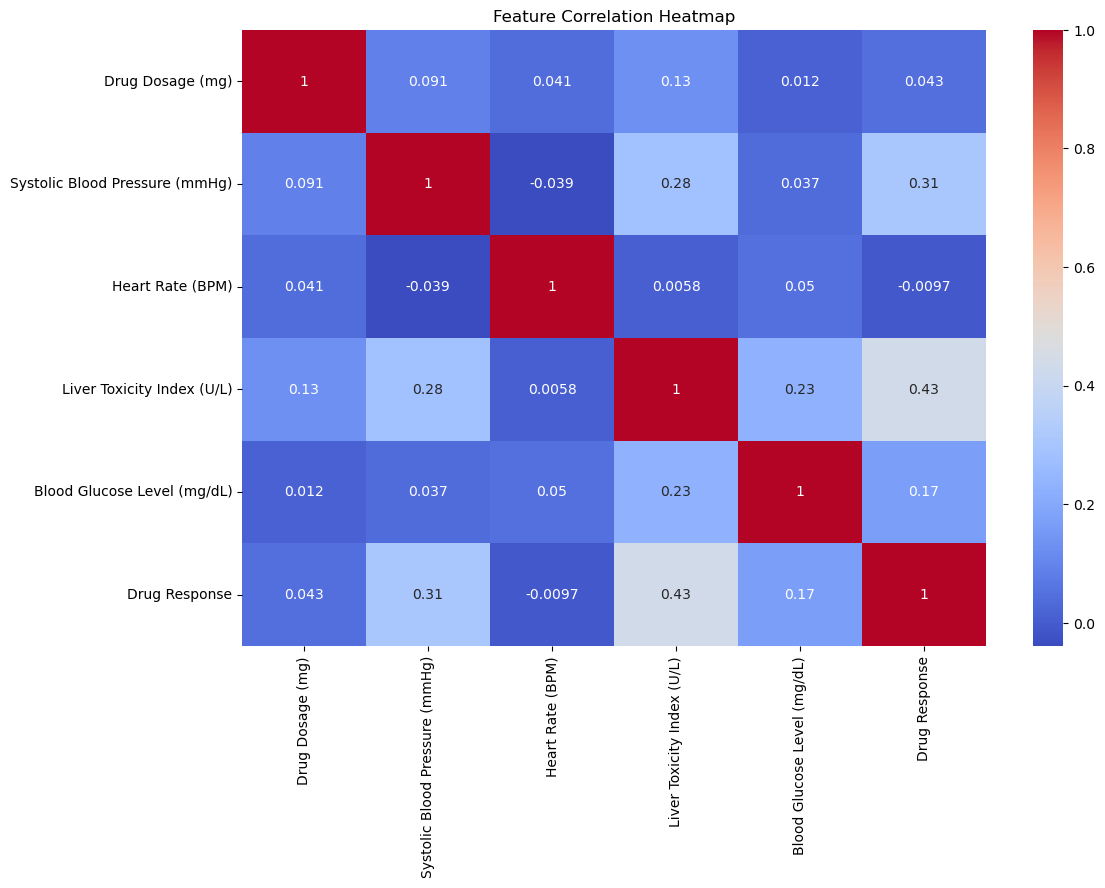

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


# Task 2: Data Preprocessing
## 1.	Encode categorical variables if necessary.


In [7]:
categorical_features = df.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in categorical_features:
    df[col] = le.fit_transform(df[col])


In [8]:
categorical_features

Index([], dtype='object')

In [9]:
le

LabelEncoder()

In [10]:
df

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1
...,...,...,...,...,...,...
495,-1.553759,0.506938,0.817890,-0.661245,-1.345393,0
496,0.551476,1.714321,0.340589,1.712558,-0.496315,1
497,-1.072743,-0.221137,0.239247,1.112924,-0.285838,1
498,1.661259,0.245759,-0.457096,0.633355,0.657413,0


# 2.	Split the dataset into training and testing sets.

In [11]:
X = df.drop("Drug Response", axis=1)   # CHANGE TARGET NAME IF NEEDED
y = df["Drug Response"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [12]:
X

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL)
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355
4,0.377100,0.538410,-0.029263,1.896015,-0.960130
...,...,...,...,...,...
495,-1.553759,0.506938,0.817890,-0.661245,-1.345393
496,0.551476,1.714321,0.340589,1.712558,-0.496315
497,-1.072743,-0.221137,0.239247,1.112924,-0.285838
498,1.661259,0.245759,-0.457096,0.633355,0.657413


In [13]:
y

0      1
1      1
2      0
3      1
4      1
      ..
495    0
496    1
497    1
498    0
499    1
Name: Drug Response, Length: 500, dtype: int64

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [15]:
scaler

,copy,True
,with_mean,True
,with_std,True


# Task 3: Data Visualization
## 1.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.


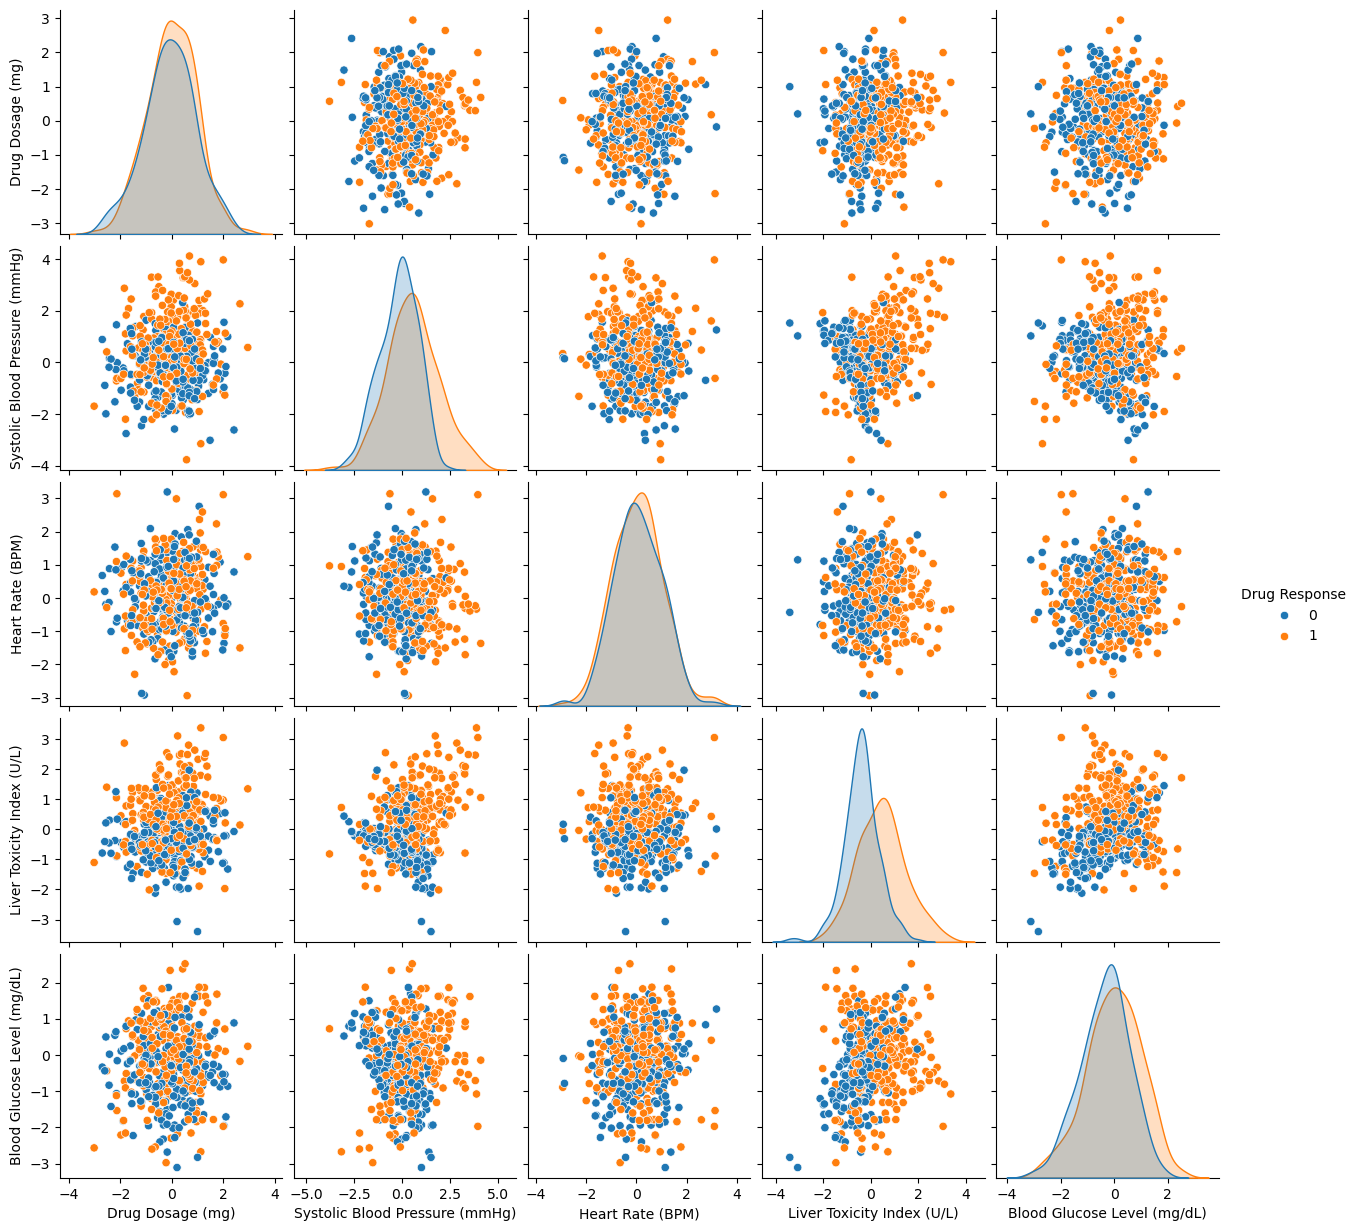

In [16]:
sns.pairplot(df, hue="Drug Response")
plt.show()


## 2.	Visualize class distributions to gauge dataset balance or imbalance.

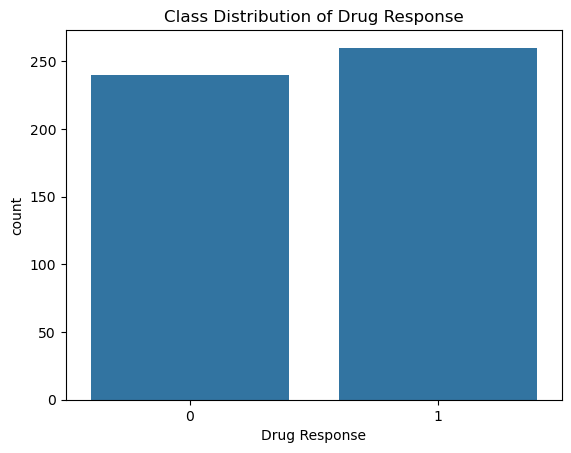

In [17]:
sns.countplot(x=y)
plt.title("Class Distribution of Drug Response")
plt.show()


# Task 4: SVM Implementation
## 1.	Implement a basic SVM classifier using Python libraries like scikit-learn.


In [18]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


## 2.	Train the SVM model on the training data.

In [19]:
y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.77

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.71      0.75        48
           1       0.75      0.83      0.79        52

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.77      0.77      0.77       100



## 3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

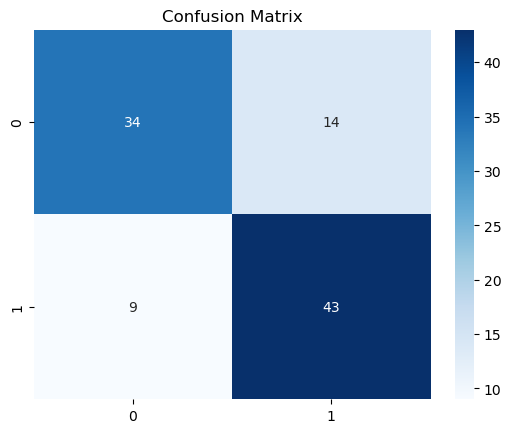

In [20]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


# Task 5: Visualization of SVM Results
## 1.	Visualize classification results on the testing data.


In [24]:
!pip install mlxtend


  Using cached mlxtend-0.24.0-py3-none-any.whl.metadata (7.3 kB)
Using cached mlxtend-0.24.0-py3-none-any.whl (1.4 MB)


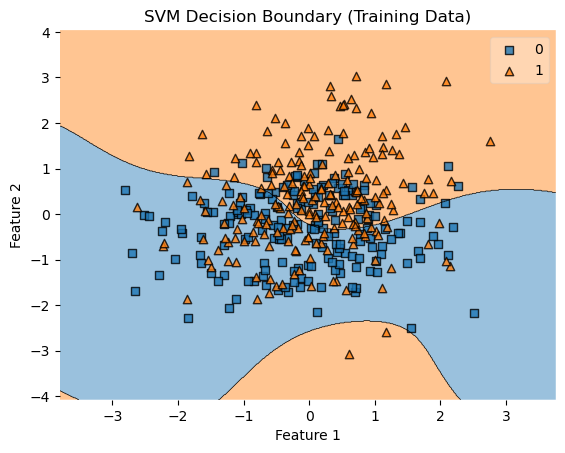

In [25]:
from mlxtend.plotting import plot_decision_regions

X_vis = X_train[:, :2]
svm_vis = SVC(kernel='rbf')
svm_vis.fit(X_vis, y_train)

plot_decision_regions(X_vis, y_train.values, clf=svm_vis)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM Decision Boundary (Training Data)")
plt.show()


# Task 6: Parameter Tuning and Optimization
## 1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.


In [26]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)


Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [27]:
#Evaluate Optimized Model
best_svm = grid.best_estimator_
y_pred_best = best_svm.predict(X_test)

print(classification_report(y_test, y_pred_best))


              precision    recall  f1-score   support

           0       0.79      0.71      0.75        48
           1       0.75      0.83      0.79        52

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.77      0.77      0.77       100



# Task 7: Comparison and Analysis
## 1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).


In [28]:
kernels = ['linear', 'poly', 'rbf']
results = {}

for k in kernels:
    model = SVC(kernel=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    results[k] = accuracy_score(y_test, preds)

results


{'linear': 0.72, 'poly': 0.65, 'rbf': 0.77}

## 2. Strengths & Weaknesses of SVM (Analysis)

## Strengths

### Performs well with high-dimensional biological data

### Effective when decision boundaries are non-linear

### Robust to overfitting with proper regularization

## Weaknesses

### Computationally expensive for large datasets

### Sensitive to feature scaling

### Hard to interpret compared to tree-based models

# 3. Practical Implications in Pharma Industry

### Predicts drug efficacy or patient response

### Supports personalized medicine

### Helps in clinical trial optimization

### Reduces drug development cost and time

# Business Context

## Problem Statement: Drug Response Classification

### Pharmaceutical companies face high costs and long timelines when conducting clinical trials. A major challenge is that not all patients respond to drugs in the same way due to biological variability, metabolism, and pre-existing conditions. Identifying whether a patient will respond positively to a drug early in the trial process can significantly reduce costs, risks, and development time.

### This problem can be formulated as a binary classification task, where machine learning models predict whether a patient will respond to a drug based on clinical and biological data.

# Machine Learning Objective

## Goal:
### Predict drug response for a patient using historical and biological data.

## Target Variable:
##  Drug_Response

### 0 → No Response

### 1 → Positive Response

## Type of Problem:

### Supervised Learning

### Binary Classification

# interpretation of the Classification Labels
## Class 0: No Response

### The drug does not produce measurable clinical improvement.

### Patient biomarkers remain unchanged or worsen.

## Indicates:

### Drug incompatibility

### Ineffective dosage

### Drug resistance or metabolic issues

## Class 1: Positive Response

### The drug produces significant clinical improvement.

### Biomarkers show measurable positive change.

## Indicates:

### Drug effectiveness

### Proper dosage

### Favorable patient metabolism

# Why This Classification Matters
## 1. Pharmaceutical Industry

### Reduces failed late-stage clinical trials

### Improves go/no-go decisions early

### Saves millions in R&D costs

## 2. Personalized Medicine

### Enables patient-specific treatment plans

### Reduces adverse drug reactions

### Improves treatment success rates

## 3. Machine Learning in Healthcare

### Leverages patient data to predict outcomes

### Supports data-driven clinical decisions

### Accelerates drug discovery pipelines

# Typical Features Used in Drug Response Models

## Examples of input variables:

### Age, gender

### Genetic markers

### Baseline biomarker values (e.g., blood pressure, glucose)

### Enzyme activity levels

### Medical history and comorbidities

###Drug dosage

# Example ML Models Commonly Used

### Logistic Regression (baseline, interpretable)

### Random Forest

### Gradient Boosting (XGBoost, LightGBM)

### Neural Networks (for complex biological data)

# Evaluation Metrics (Healthcare-Relevant)

### Accuracy – overall correctness

### Precision – avoid false positives (important for safety)

### Recall (Sensitivity) – detect true responders

### ROC-AUC – overall classification quality

# Business Impact

### Faster clinical trial decisions

### Lower trial attrition rates

### Improved patient outcomes

### Regulatory support through data-driven evidence